# 데이터 로드

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../data/diabetes.csv")
df.shape


(768, 9)

In [8]:
df.shape

(768, 9)

In [7]:
df.info()  # null인 데이터가 없다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 결측치 시각화

In [11]:
df_null = df.isnull()
df_null.sum()  # # null인 데이터가 없다

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()  # 하지만 0이 나올 수 없는 데이터에 대해 min(최소값)이 0인 데이터가 존재한다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
# 0값을 결측치로 보고 null 값으로 변경
feature_columns = df.columns[:-1].tolist()
df_null = df[feature_columns].replace(0, np.nan).isnull()
df_null

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False
764,False,False,False,False,True,False,False,False
765,False,False,False,False,False,False,False,False
766,False,False,False,True,True,False,False,False


In [32]:
# 결측치 비율
df_null.mean()  # 인슐린의 경우 결측치의 비율이 높다.

Pregnancies                 0.144531
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
dtype: float64

<Axes: >

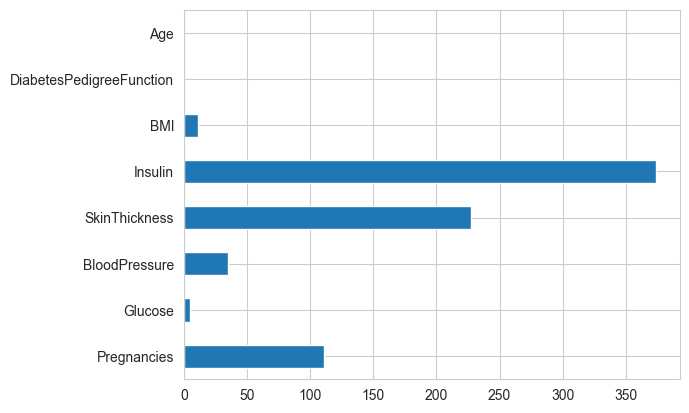

In [26]:
# 결측치 갯수 시각화
df_null.sum().plot.barh()


<Axes: >

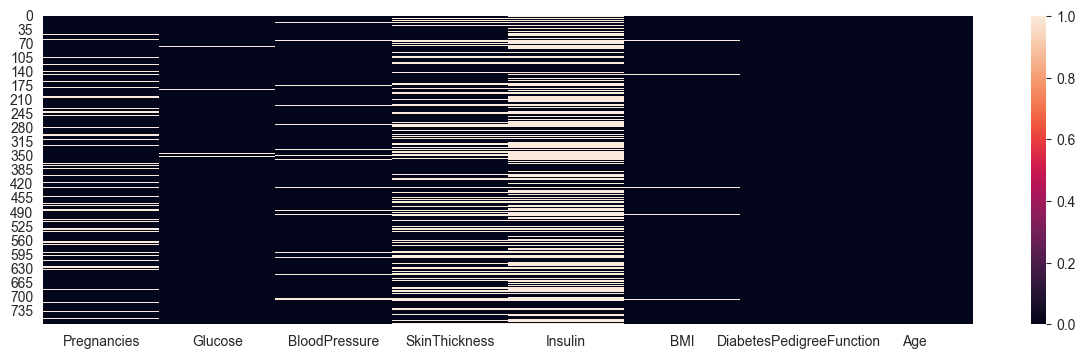

In [36]:
# 결측치 시각화 - False가 0, True가 1
plt.figure(figsize=(15, 4))
sns.heatmap(df_null)


# 정답값


In [43]:
df["Outcome"].value_counts(normalize=True)  # 정답값인 Outcome의 비율 확인

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [64]:
# 발병여부를 임신횟수로 그룹화
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
# mean: 임신횟수별 발병률, count: 해당 임심횟수의 전체 수
# reset_index: 새로운 index 값 생성

df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

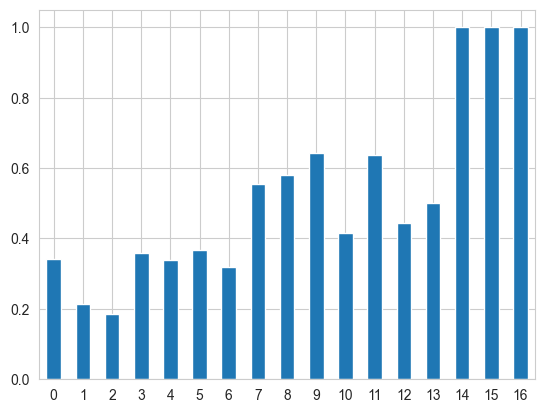

In [72]:
df_po["mean"].plot.bar(
    rot=0,  # x축 label 을 가로로
)


## countplot으로 시각화


<Axes: xlabel='Outcome', ylabel='count'>

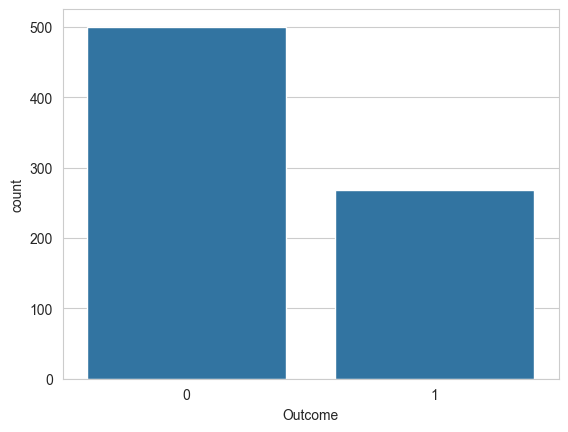

In [81]:
# 발병 빈도 확인
# 발병하는 빈도가 더 낮은 것을 확인할 수 있다.
sns.countplot(data=df, x="Outcome")


<Axes: xlabel='Pregnancies', ylabel='count'>

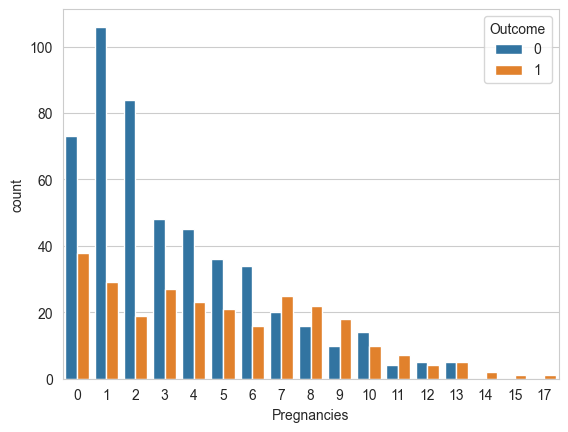

In [88]:
# 임신횟수에 따른 발병 횟수 시각화
# 7회가 넘어가면 발병하는 비율이 높아진다
# 이런 특정 케이스에 대해서는 overfitting이 생길 수 있다.
sns.countplot(data=df, x="Pregnancies", hue="Outcome")


In [87]:
# 임신횟수를 범주화시킨다.
df["Pregnancies_high"] = df["Pregnancies"] > 6
df["Pregnancies_high"]


0      False
1      False
2       True
3      False
4      False
       ...  
763     True
764    False
765    False
766    False
767    False
Name: Pregnancies_high, Length: 768, dtype: bool

<Axes: xlabel='Pregnancies_high', ylabel='count'>

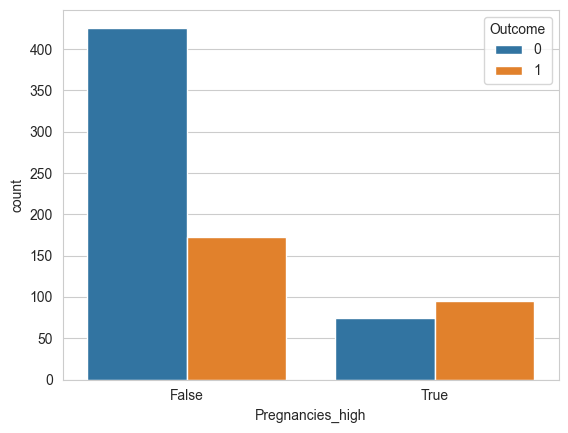

In [90]:
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")


<Axes: xlabel='Outcome', ylabel='BMI'>

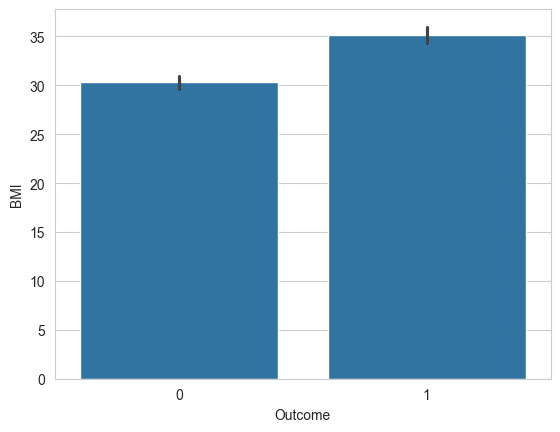

In [96]:
# 발병 여부에 따른 다른 데이터의 비율 확인: BMI
# y 축은 평균 값이다 (cf: estimator)
sns.barplot(data=df, x="Outcome", y="BMI")

<Axes: xlabel='Outcome', ylabel='Glucose'>

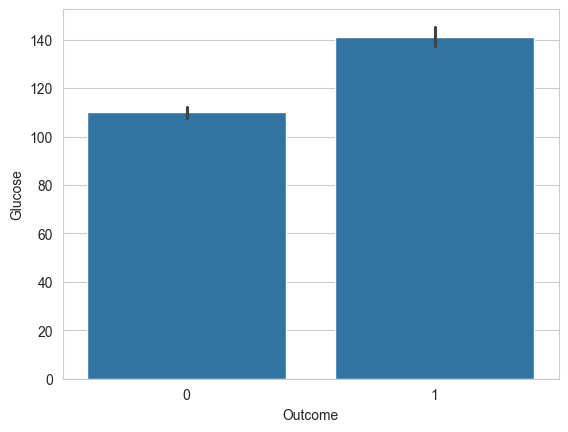

In [97]:
# 발병 여부에 따른 다른 데이터의 비율 확인: Glucose
# y 축은 평균 값이다 (cf: estimator)
sns.barplot(data=df, x="Outcome", y="Glucose")

<Axes: xlabel='Outcome', ylabel='Insulin'>

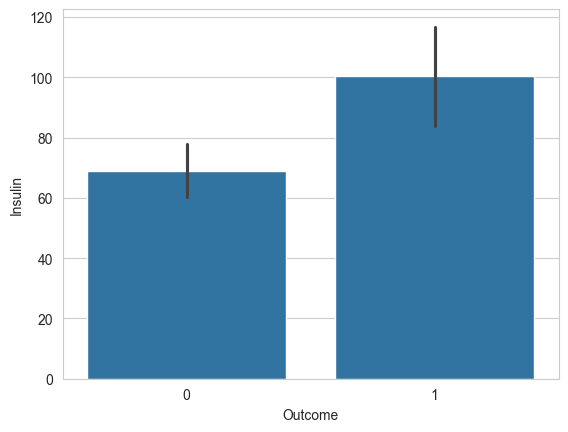

In [100]:
# 발병 여부에 따른 다른 데이터의 비율 확인: Insulin
# y 축은 평균 값이다 (cf: estimator)
sns.barplot(data=df, x="Outcome", y="Insulin")


<Axes: xlabel='Pregnancies', ylabel='Outcome'>

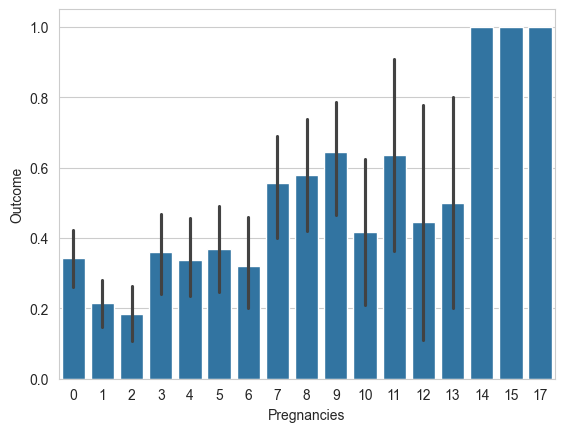

In [106]:
# 임신횟수 별 발병 비율
sns.barplot(data=df, x="Pregnancies", y="Outcome")


# 데이터 상관관계 확인

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

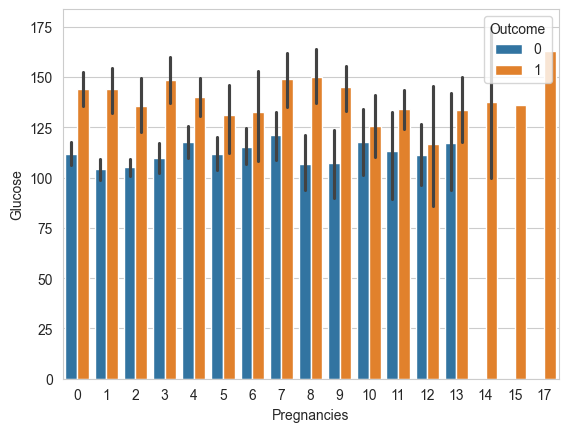

In [108]:
# 임신 횟수에 따른 포도당 수치를 발병여부에 따라 시각화
# 임신 횟수에 따라 포도당 수치가 변하는 양상은 아님
# 다만 포도당 수치와 발병과는 상관관계가 있음
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")


<Axes: xlabel='Pregnancies', ylabel='BMI'>

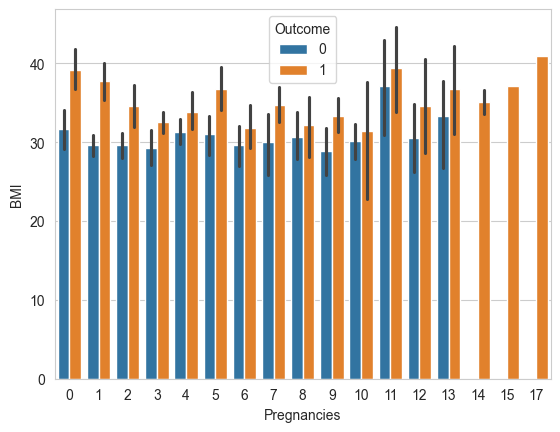

In [114]:
# 임신 횟수에 따른 BMI 수치를 발병여부에 따라 시각화
# 임신 횟수에 따라 BMI 수치가 변하는 양상은 아님
# 다만 BMI 수치와 발병과는 상관관계가 있음
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

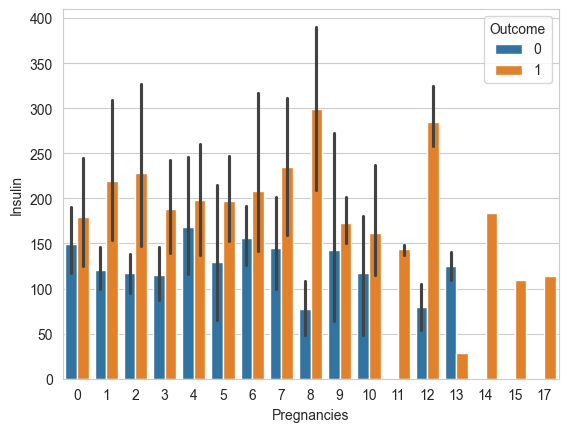

In [120]:
# 임신 횟수에 따른 인슐린 수치를 발병여부에 따라 시각화
# 인슐린 데이터는 결측치가 많으므로 결측치를 제외한 데이터에 대해서 시각화한다.
sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

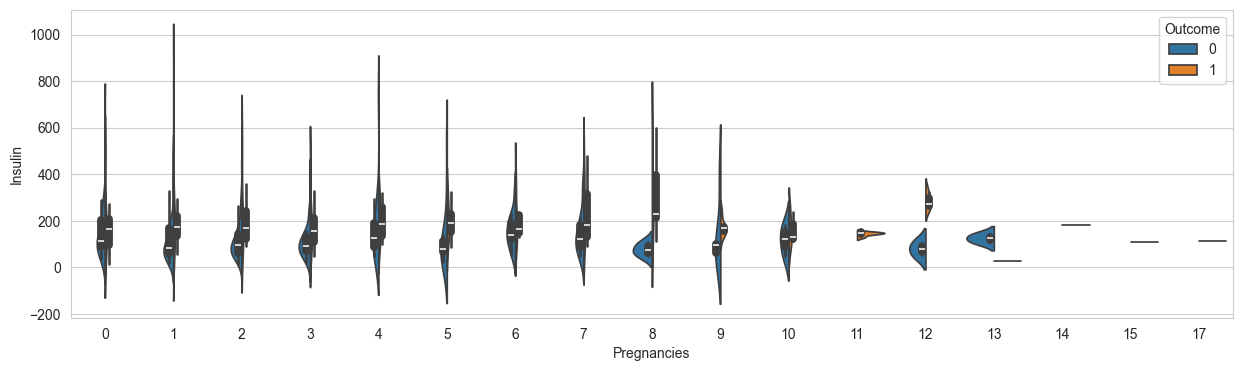

In [126]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


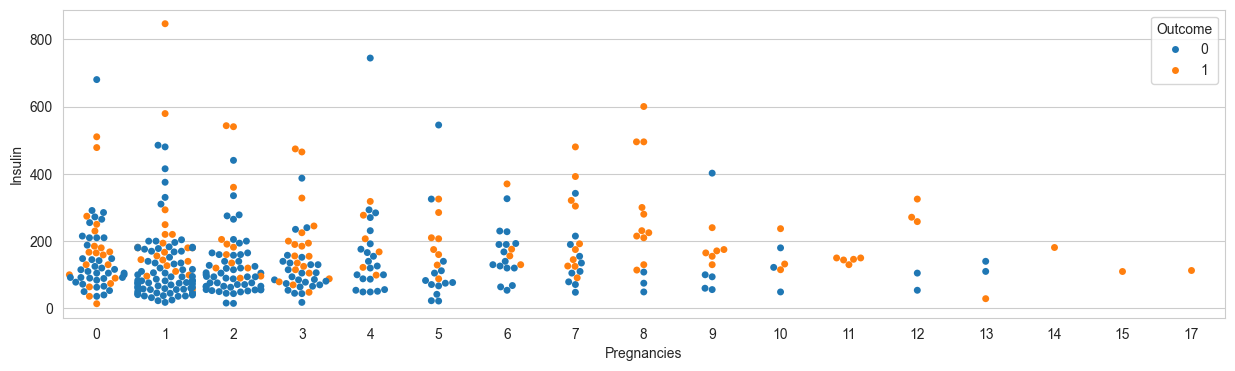

In [129]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")


/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_36860/3442708258.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Pregnancies"], label="0")
/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_36860/3442708258.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Pr

<Axes: xlabel='Pregnancies', ylabel='Density'>

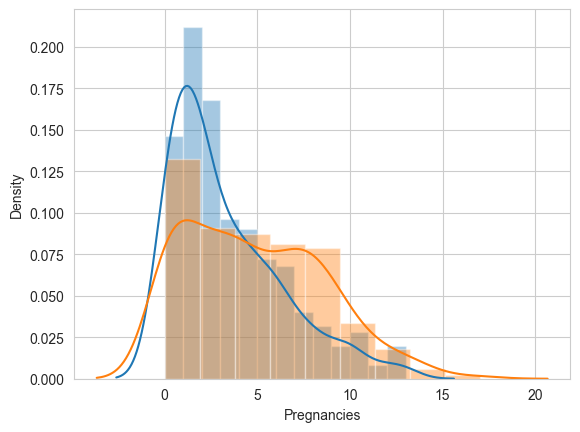

In [146]:
# countplot은 범주형 데이터 시각화에 좋다
# distplot은 연속된 수치형 데이터 시각화에 좋다

df_0 = df[df["Outcome"] == 0]  # 발병하지 않는 케이스
df_1 = df[df["Outcome"] == 1]  # 발병 케이스

# 임신 횟수가 많아질 수록 발병하는 케이스가 안하는 케이스에 비해 많아진다.
sns.distplot(df_0["Pregnancies"], label="0")
sns.distplot(df_1["Pregnancies"], label="1")


/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_36860/2959232361.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Age"], hist=False, rug=True, label="0")
/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_36860/2959232361.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

<Axes: xlabel='Age', ylabel='Density'>

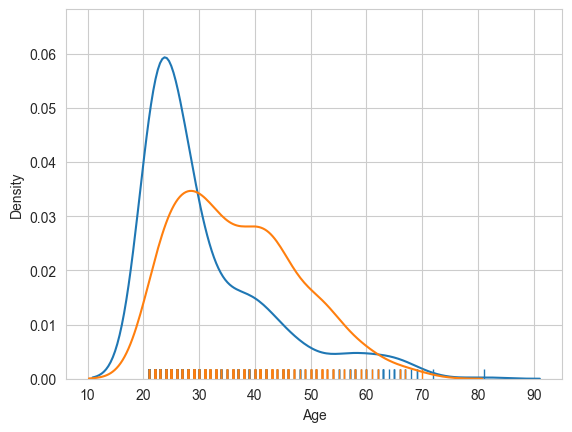

In [149]:
# 30세 이후에 발병하는 케이스가 많다
sns.distplot(df_0["Age"], hist=False, rug=True, label="0")
sns.distplot(df_1["Age"], hist=False, rug=True, label="1")

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>],
       [<Axes: title={'center': 'Pregnancies_high'}>, <Axes: >, <Axes: >]],
      dtype=object)

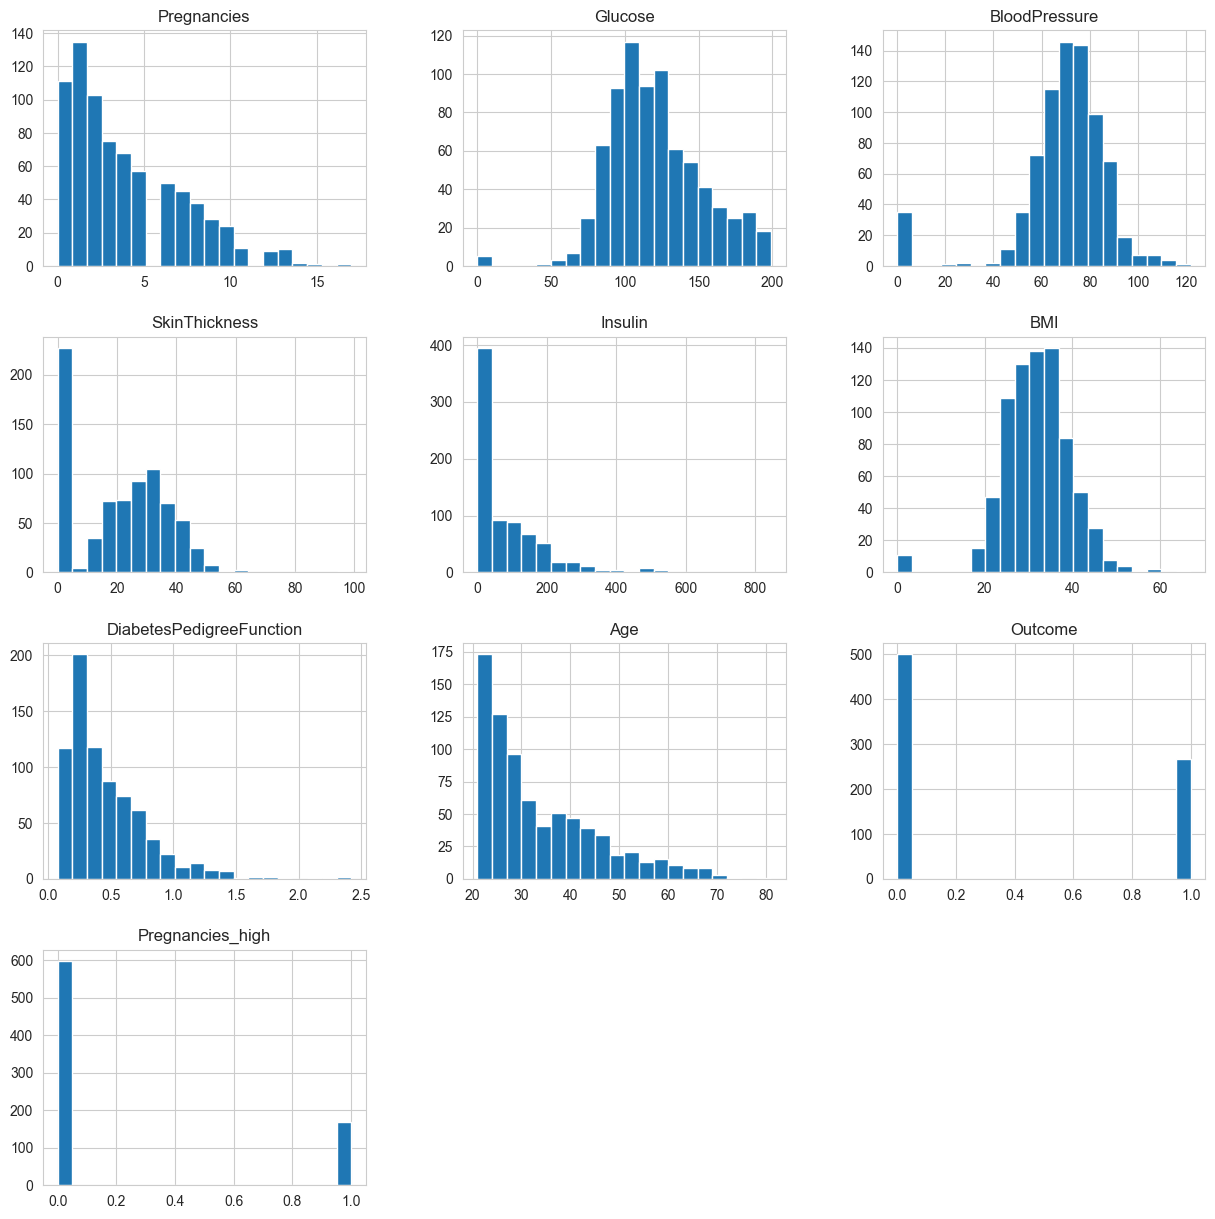

In [161]:
# subplots

df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)  # histogram을 그릴 때 boolean 타입이 있으면 오류가 난다
df.hist(
    figsize=(15, 15),  # 이미지 크기
    bins=20,  # 막대의 개수
)

/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_36860/3041008960.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name], ax=axes[row][col])
/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_36860/3041008960.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c

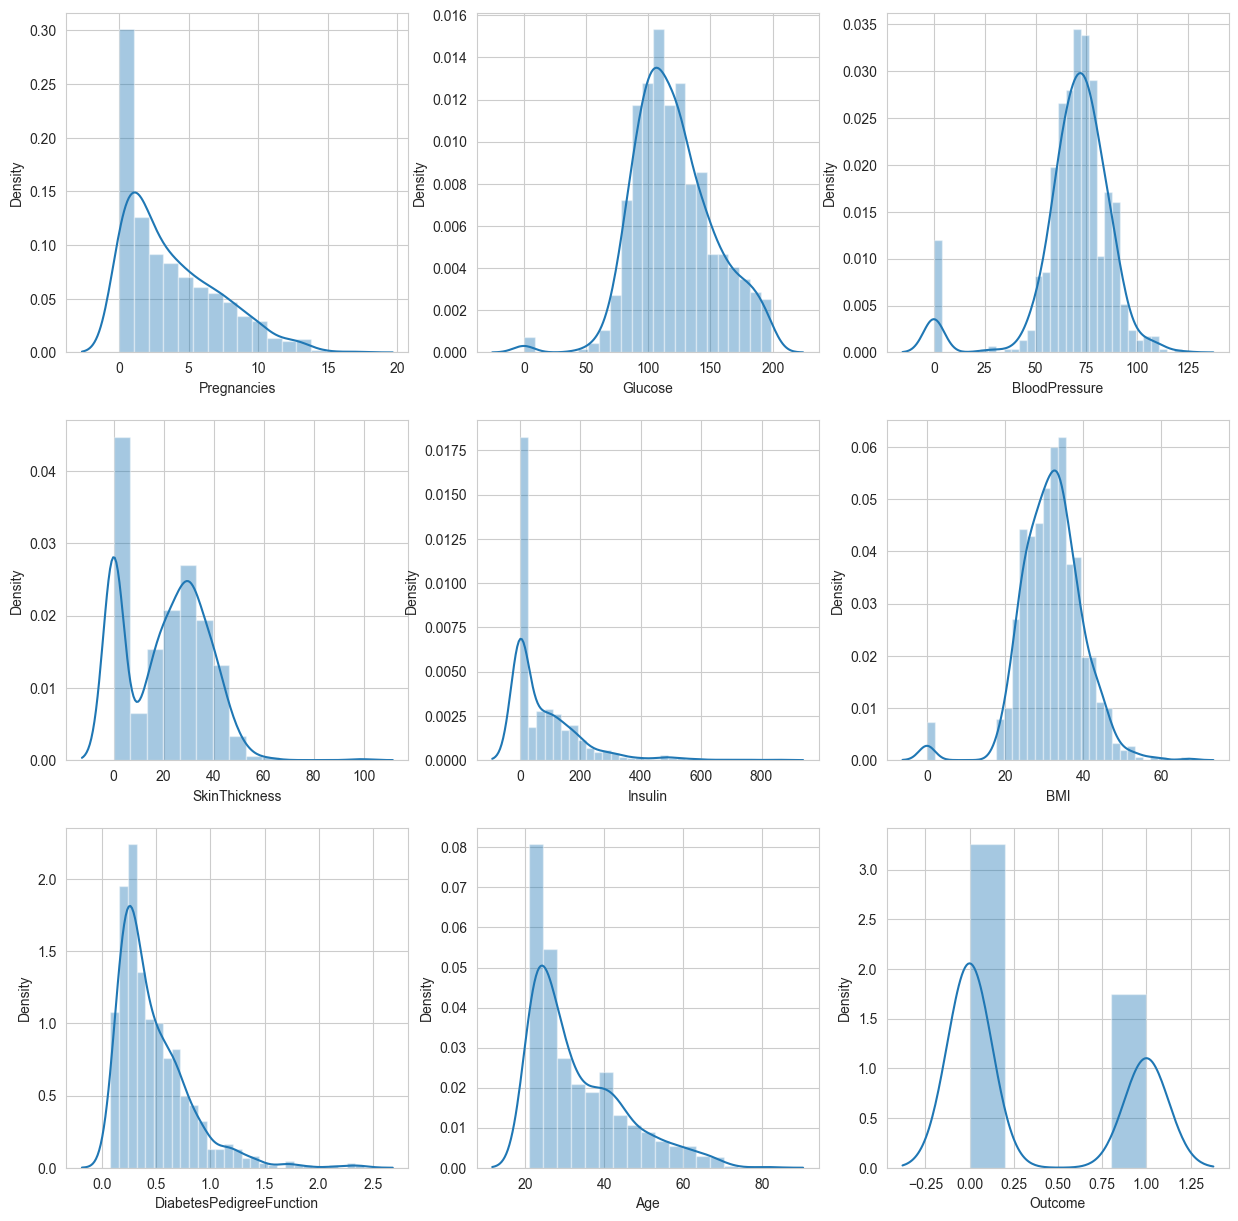

In [166]:
column_num = df.columns.shape
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

column_names = df.columns[:-1].tolist()
for i, column_name in enumerate(column_names):
    row = i // 3
    col = i % 3

    sns.distplot(df[column_name], ax=axes[row][col])

/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_36860/2668343161.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[column_name], ax=axes[row][col])
/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_36860/2668343161.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

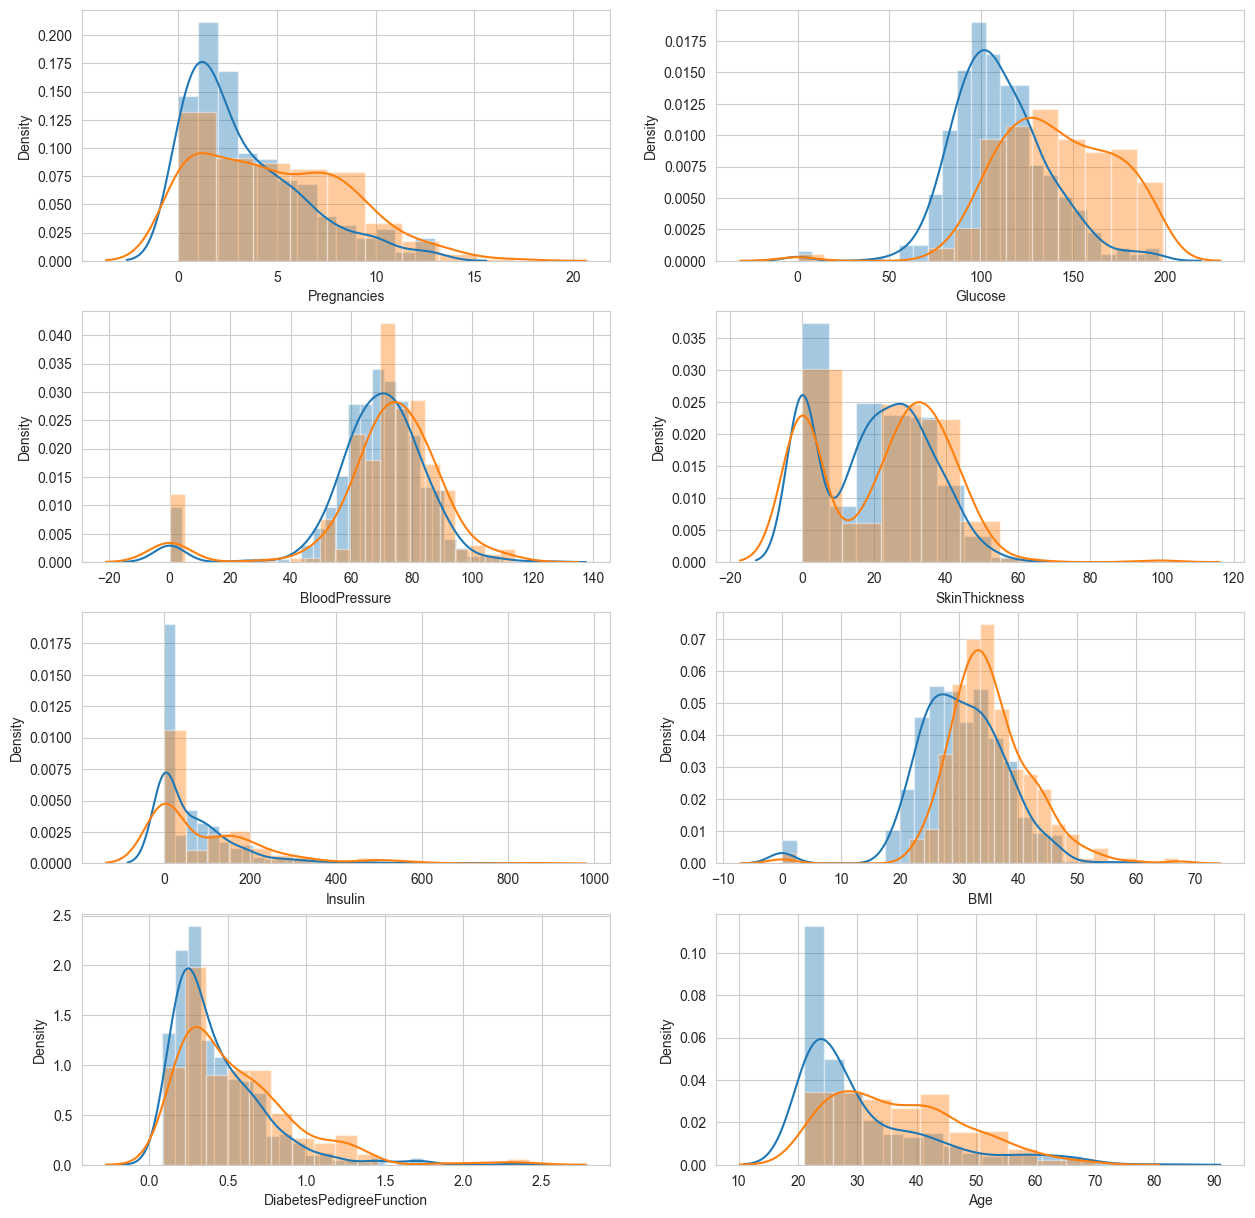

In [172]:
# Outcome, Pregnancies_high 제외
column_names = df.columns[:-2].tolist()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, column_name in enumerate(column_names):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[column_name], ax=axes[row][col])
    sns.distplot(df_1[column_name], ax=axes[row][col])


# [상관 분석](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)

당뇨병 여부가 다른 변수와 어느정도 상관관계가 있는지를 분석


## 상관 계수 구하기 - 결측치 처리 전

In [185]:
df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


<Axes: >

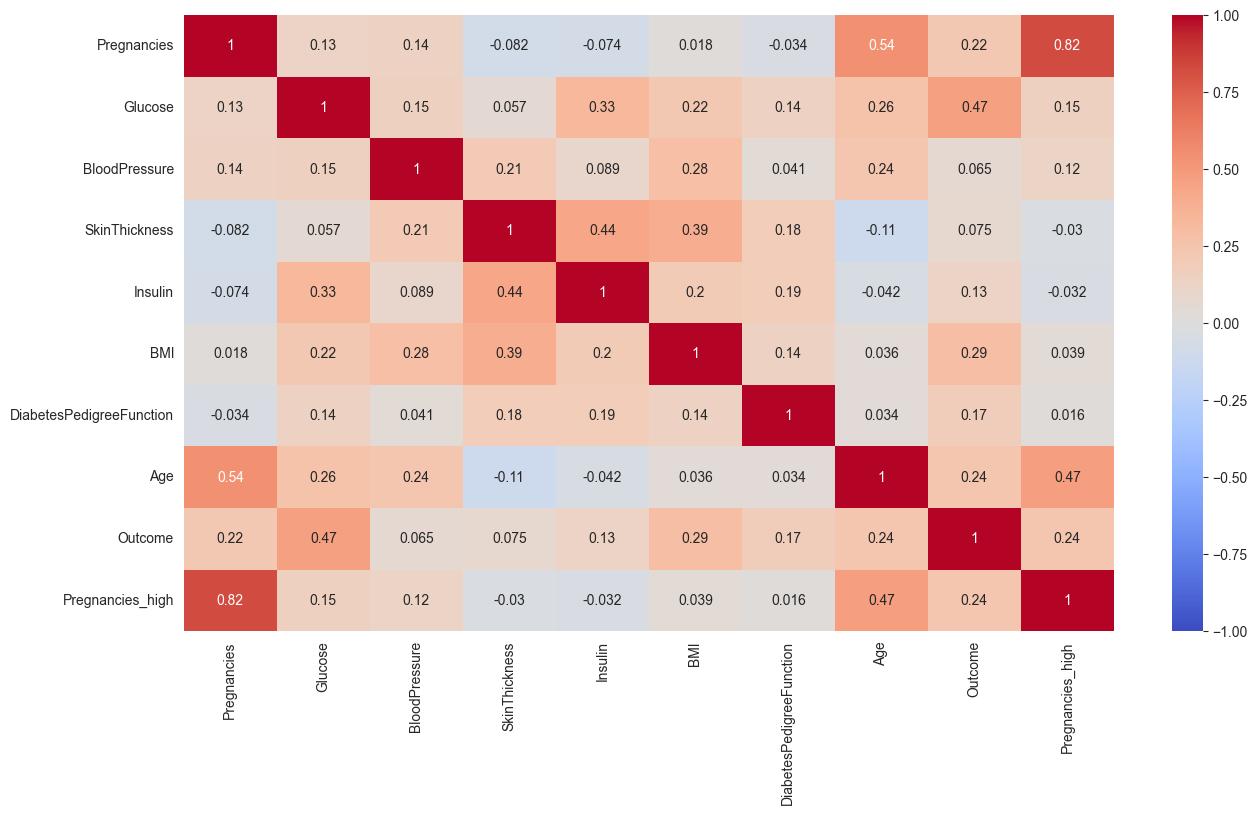

In [186]:
# 상관계수 heatmap으로 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")


## 상관 계수 구하기 - 결측치 처리 후


In [191]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)  # 0 값을 null로 처리
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [192]:
df_matrix_corr = df_matrix.corr()
df_matrix_corr.style.background_gradient()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

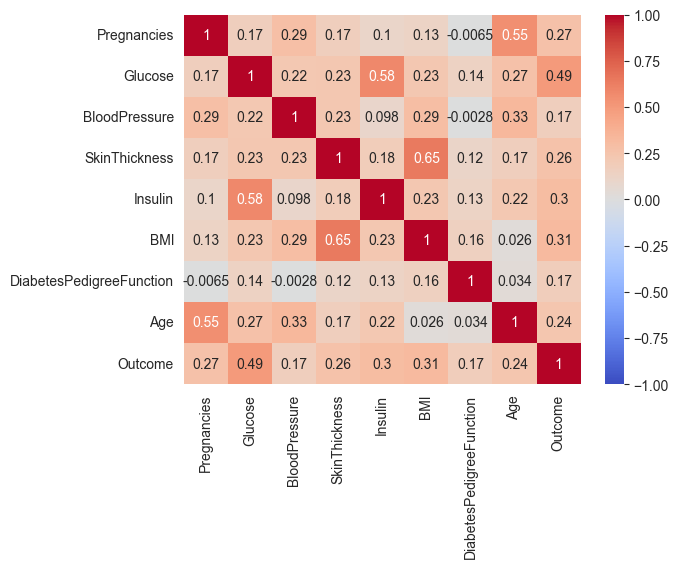

In [196]:
sns.heatmap(df_matrix_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

display(df_matrix_corr["Outcome"])

## 상관계수가 높은 변수끼리 보기


<Axes: xlabel='Insulin', ylabel='Glucose'>

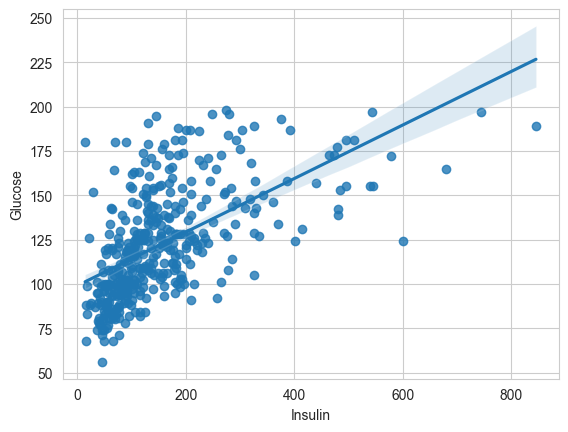

In [199]:
# 그래프가 선형이니 서로 상관 관계가 높은 것 같다
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")


<Axes: xlabel='Age', ylabel='Pregnancies'>

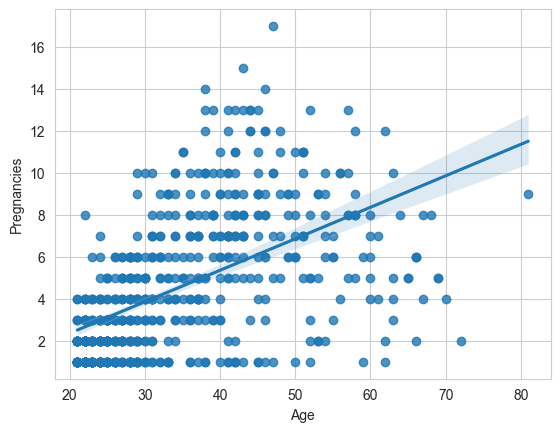

In [200]:
sns.regplot(data=df_matrix, x="Age", y="Pregnancies")


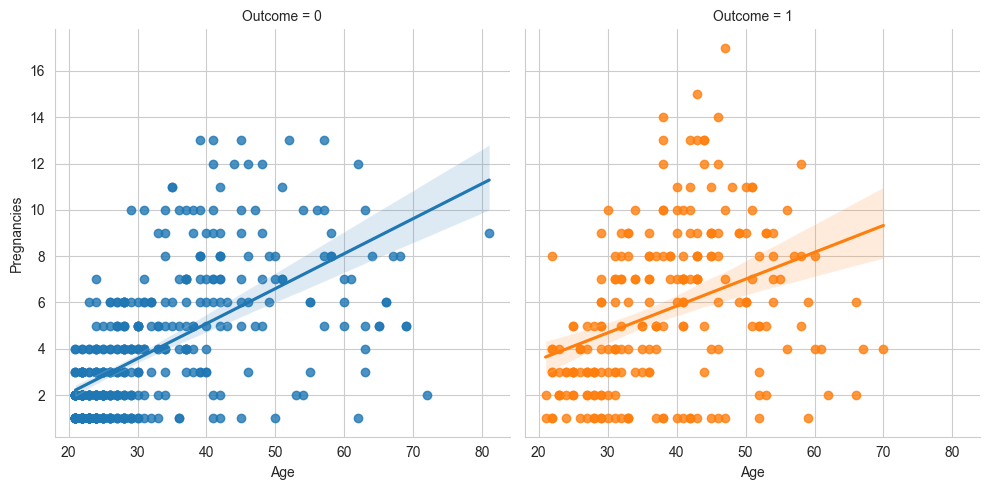

In [205]:
sns.lmplot(data=df_matrix, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")
